In [9]:
import yfinance as yf
import riskfolio as rf
import pandas as pd
import seaborn as sns
import numpy as np
import streamlit as slt
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

# ignore unwanted warnings
import warnings 
warnings.filterwarnings("ignore")

In [10]:
tickers = ["WBD","BCC","SOLV","PFE","OXY","PG","T","TJX","MMM","BA","O","KMI","CSCO","CVS","DIS","MA","RTX","AXP","BX"]
years_delta = 1
end_date = datetime.today()
start_date = end_date - timedelta(days =  years_delta * 365)

In [11]:
adj_close_df = pd.DataFrame()
perc_change_df = pd.DataFrame()

for scrip in tickers:
    data = yf.download(scrip, start = start_date, end = end_date)
    adj_close_df[scrip] = data['Adj Close']
    perc_change_df[scrip] = data['Adj Close'].pct_change()

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

In [12]:
cumulative_returns = cumulative_returns.dropna()
cumulative_returns.head()

,WBD,BCC,SOLV,PFE,OXY,PG,T,TJX,MMM,BA,O,KMI,CSCO,CVS,DIS,MA,RTX,AXP,BX
Date,,,,,,,,,,,,,,,,,,,
2024-04-02,-0.178295,0.674538,-0.031838,-0.139076,0.071163,0.134552,0.232235,0.126595,0.287995,-0.017041,0.082608,0.126818,-0.076247,0.059361,0.460821,0.200764,0.363302,0.495628,0.224349
2024-04-03,-0.154070,0.696573,-0.075398,-0.149389,0.078329,0.103321,0.238565,0.101791,0.292850,-0.033351,0.080560,0.134770,-0.080398,0.070555,0.415148,0.195730,0.349468,0.502923,0.226869
2024-04-04,-0.182171,0.676786,-0.030391,-0.167201,0.077055,0.098375,0.235752,0.084462,0.256086,-0.041871,0.077489,0.127429,-0.092285,0.060509,0.392669,0.176570,0.373815,0.460748,0.221441
2024-04-05,-0.193798,0.708714,0.013893,-0.166888,0.102855,0.102968,0.225202,0.096467,0.262884,-0.042656,0.085475,0.129265,-0.083983,0.070267,0.408012,0.195054,0.406739,0.479840,0.236659
2024-04-08,-0.174419,0.713661,-0.030246,-0.169388,0.094573,0.102544,0.213245,0.089899,0.275370,-0.050915,0.098375,0.123147,-0.089832,0.068258,0.395761,0.200973,0.409368,0.490816,0.253526


In [13]:
mean_portfolio_cumilative_return.head()

Date
2023-10-12         NaN
2023-10-13   -0.001377
2023-10-16    0.010562
2023-10-17    0.014575
2023-10-18    0.001968
dtype: float64

In [14]:
cumulative_returns = ( perc_change_df + 1 ).cumprod() - 1

# mean returns of portfolio along the rows
mean_portfolio_cumilative_return = cumulative_returns.mean(axis = 1)

In [15]:
benchmark = yf.download("^GSPC", start=start_date)['Adj Close']
bmark_perc_return = benchmark.pct_change()
bmark_deviation =  ( bmark_perc_return + 1 ).cumprod() - 1
bmark_deviation

[*********************100%%**********************]  1 of 1 completed


Date
2023-10-12         NaN
2023-10-13   -0.005019
2023-10-16    0.005522
2023-10-17    0.005424
2023-10-18   -0.008049
                ...   
2024-10-07    0.309529
2024-10-08    0.322217
2024-10-09    0.331623
2024-10-10    0.328866
2024-10-11    0.336908
Name: Adj Close, Length: 252, dtype: float64

In [16]:
weights = ( np.ones( len(cumulative_returns.cov())) / len(cumulative_returns.cov()) )

portfolio_std_dev = (weights.dot(cumulative_returns.cov()).dot(weights)) ** 0.5

In [17]:
weights

array([0.05263158, 0.05263158, 0.05263158, 0.05263158, 0.05263158,
       0.05263158, 0.05263158, 0.05263158, 0.05263158, 0.05263158,
       0.05263158, 0.05263158, 0.05263158, 0.05263158, 0.05263158,
       0.05263158, 0.05263158, 0.05263158, 0.05263158])

In [18]:
portfolio_std_dev

0.07050496901935163

In [19]:
cumulative_returns.cov()

,WBD,BCC,SOLV,PFE,OXY,PG,T,TJX,MMM,BA,O,KMI,CSCO,CVS,DIS,MA,RTX,AXP,BX
WBD,0.018602,-0.010060,0.001578,-0.000489,-0.000530,-0.008215,-0.012847,-0.011833,-0.024528,0.015484,-0.004730,-0.012984,0.001520,0.009990,-0.004839,-0.006842,-0.022352,-0.026040,-0.009691
BCC,-0.010060,0.030279,0.006750,-0.002223,-0.000675,0.006286,0.013376,0.009228,0.022721,-0.007066,0.007880,0.010977,-0.000292,0.000014,0.012769,0.011466,0.021778,0.031031,0.019144
SOLV,0.001578,0.006750,0.007879,0.000040,-0.002216,0.000699,0.003887,-0.000371,0.008103,-0.003429,0.003722,0.001931,0.002591,0.001573,0.000854,0.003300,0.005012,0.004056,0.005375
PFE,-0.000489,-0.002223,0.000040,0.002023,-0.001187,0.000885,0.002572,0.002145,0.005900,-0.001661,0.001635,0.002659,0.000473,-0.002303,-0.003641,-0.000478,0.002675,0.001011,0.001020
OXY,-0.000530,-0.000675,-0.002216,-0.001187,0.004113,-0.001224,-0.005384,-0.003306,-0.008953,0.000035,-0.003912,-0.003248,-0.000860,0.000925,0.004169,-0.001112,-0.004321,-0.002942,-0.004228
PG,-0.008215,0.006286,0.000699,0.000885,-0.001224,0.004823,0.008794,0.007316,0.016199,-0.007500,0.004249,0.008042,-0.000301,-0.005313,0.001098,0.004058,0.013227,0.014993,0.007350
T,-0.012847,0.013376,0.003887,0.002572,-0.005384,0.008794,0.021639,0.015969,0.039090,-0.012217,0.012045,0.018357,0.000804,-0.008833,-0.002002,0.008355,0.027612,0.029745,0.018551
TJX,-0.011833,0.009228,-0.000371,0.002145,-0.003306,0.007316,0.015969,0.013666,0.029602,-0.010368,0.008404,0.014270,0.000088,-0.008060,-0.001221,0.006185,0.021647,0.023680,0.013522
MMM,-0.024528,0.022721,0.008103,0.005900,-0.008953,0.016199,0.039090,0.029602,0.081266,-0.023804,0.024017,0.036408,0.001258,-0.019845,-0.006867,0.014018,0.054544,0.054831,0.033496
BA,0.015484,-0.007066,-0.003429,-0.001661,0.000035,-0.007500,-0.012217,-0.010368,-0.023804,0.019076,-0.004403,-0.012079,-0.000658,0.009387,-0.001973,-0.005763,-0.020765,-0.021471,-0.007989


In [21]:
slt.subheader('portfolio vs Index SnP 500')

t = pd.concat([bmark_deviation, mean_portfolio_cumilative_return], axis = 1)
t.columns = ['SnP 500 Performance', 'Portfolio Performance']

2024-10-11 16:42:18.660 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-11 16:42:18.662 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


In [22]:
slt.line_chart(data = t)

2024-10-11 16:42:36.627 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-11 16:42:36.628 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


DeltaGenerator()

In [28]:
slt.subheader("Porfolio Risk")
print(round(portfolio_std_dev,4))

slt.subheader("Benchmark Risk")
print(round(bmark_perc_return.std(),4))


2024-10-11 16:53:54.892 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-11 16:53:54.894 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-11 16:53:54.896 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-11 16:53:54.896 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


0.0705
0.0079


2024-10-11 16:46:43.602 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-11 16:46:43.667 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-11 16:46:43.667 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


DeltaGenerator()

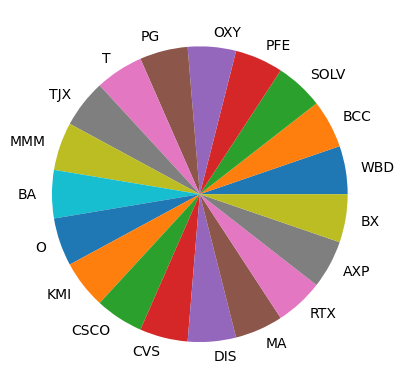

In [24]:
fig, ax = plt.subplots()
ax.pie(weights, labels=tickers)
slt.pyplot(fig)